In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Dataset:  lsd.csv

Source: Wagner, Agahajanian, and Bing (1968). Correlation of Performance
Test Scores with Tissue Concentration of Lysergic Acid Diethylamide in
Human Subjects. Clinical Pharmacology and Therapeutics, Vol.9 pp635-638.

Description: Group of volunteers was given LSD, their mean scores on
math exam and tissue concentrations of LSD were obtained at n=7 time points.

Variables/Columns

TC: Tissue Concentration   1-4
SCORE: Math Score          8-12


In [2]:
# Read the csv file into a pandas DataFrame
df = pd.read_csv("../data/SnowData.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df

Unnamed: 0        Date Station Name  \
0                0  2000-01-01     Apishapa   
1                1  2000-01-02     Apishapa   
2                2  2000-01-03     Apishapa   
3                3  2000-01-04     Apishapa   
4                4  2000-01-05     Apishapa   
...            ...         ...          ...   
814973      814973  2021-05-13       Zirkel   
814974      814974  2021-05-14       Zirkel   
814975      814975  2021-05-15       Zirkel   
814976      814976  2021-05-16       Zirkel   
814977      814977  2021-05-17       Zirkel   

        Snow Water Equivalent (in) Start of Day Values  \
0                                                  4.1   
1                                                  4.1   
2                                                  4.1   
3                                                  4.1   
4                                                  4.5   
...                                                ...   
814973                                            10.3   
814974                                             8.4   
814975                                             7.2   
814976                                             6.1   
814977                                             5.0   

        Change In Snow Water Equivalent (in)  \
0                                        0.4   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.4   
...                                      ...   
814973                                   0.2   
814974                                  -1.9   
814975                                  -1.2   
814976                                  -1.1   
814977                                  -1.1   

        Snow Depth (in) Start of Day Values  Change In Snow Depth (in)  \
0                                      12.0                        0.0   
1                                      12.0                        0.0   
2                                      12.0                        0.0   
3                                      15.0                        3.0   
4                                      14.0                       -1.0   
...                                     ...                        ...   
814973                                 21.0                        2.0   
814974                                 18.0                       -3.0   
814975                                 17.0                       -1.0   
814976                                 15.0                       -2.0   
814977                                 12.0                       -3.0   

        Elevation (ft)  Air Temperature Average (degF)  Latitude  Longitude  \
0                10000                            24.0  37.33062 -105.06749   
1                10000                            18.0  37.33062 -105.06749   
2                10000                             6.0  37.33062 -105.06749   
3                10000                            21.0  37.33062 -105.06749   
4                10000                            24.0  37.33062 -105.06749   
...                ...                             ...       ...        ...   
814973            9340                            46.0  40.79488 -106.59535   
814974            9340                            45.0  40.79488 -106.59535   
814975            9340                            46.0  40.79488 -106.59535   
814976            9340                            45.0  40.79488 -106.59535   
814977            9340                            42.0  40.79488 -106.59535   

       County Name  
0         Huerfano  
1         Huerfano  
2         Huerfano  
3         Huerfano  
4         Huerfano  
...            ...  
814973     Jackson  
814974     Jackson  
814975     Jackson  
814976     Jackson  
814977     Jackson  

[664621 rows x 12 columns]

In [3]:
# dates=df['Date']
# date_convet=dates.Period.dayofyear(dates, freq="D")
# date_convet

In [4]:
# may not be needed
# df['Date'] = pd.to_datetime(df.Date)
# df['Date'] = df['Date'].dt.strftime('%Y/%m/%d').astype('datetime64[ns]')#.to_period(freq='D')
# df

In [5]:
# convert date to numaric day of the year
# dates=df['Date']
# dates=dates.dt.dayofyear
# df['Date']=dates
# df
##numaric week is not returning correctly with first two values coing in as week 52
dates=df['Date'].astype('datetime64[ns]').dt.isocalendar().week
# dates=dates.Timestamp.isocalendar()#.dt.weekofyear
df['Date']=dates
df


Unnamed: 0  Date Station Name  \
0                0    52     Apishapa   
1                1    52     Apishapa   
2                2     1     Apishapa   
3                3     1     Apishapa   
4                4     1     Apishapa   
...            ...   ...          ...   
814973      814973    19       Zirkel   
814974      814974    19       Zirkel   
814975      814975    19       Zirkel   
814976      814976    19       Zirkel   
814977      814977    20       Zirkel   

        Snow Water Equivalent (in) Start of Day Values  \
0                                                  4.1   
1                                                  4.1   
2                                                  4.1   
3                                                  4.1   
4                                                  4.5   
...                                                ...   
814973                                            10.3   
814974                                             8.4   
814975                                             7.2   
814976                                             6.1   
814977                                             5.0   

        Change In Snow Water Equivalent (in)  \
0                                        0.4   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.4   
...                                      ...   
814973                                   0.2   
814974                                  -1.9   
814975                                  -1.2   
814976                                  -1.1   
814977                                  -1.1   

        Snow Depth (in) Start of Day Values  Change In Snow Depth (in)  \
0                                      12.0                        0.0   
1                                      12.0                        0.0   
2                                      12.0                        0.0   
3                                      15.0                        3.0   
4                                      14.0                       -1.0   
...                                     ...                        ...   
814973                                 21.0                        2.0   
814974                                 18.0                       -3.0   
814975                                 17.0                       -1.0   
814976                                 15.0                       -2.0   
814977                                 12.0                       -3.0   

        Elevation (ft)  Air Temperature Average (degF)  Latitude  Longitude  \
0                10000                            24.0  37.33062 -105.06749   
1                10000                            18.0  37.33062 -105.06749   
2                10000                             6.0  37.33062 -105.06749   
3                10000                            21.0  37.33062 -105.06749   
4                10000                            24.0  37.33062 -105.06749   
...                ...                             ...       ...        ...   
814973            9340                            46.0  40.79488 -106.59535   
814974            9340                            45.0  40.79488 -106.59535   
814975            9340                            46.0  40.79488 -106.59535   
814976            9340                            45.0  40.79488 -106.59535   
814977            9340                            42.0  40.79488 -106.59535   

       County Name  
0         Huerfano  
1         Huerfano  
2         Huerfano  
3         Huerfano  
4         Huerfano  
...            ...  
814973     Jackson  
814974     Jackson  
814975     Jackson  
814976     Jackson  
814977     Jackson  

[664621 rows x 12 columns]

In [39]:
no_neg=df.loc[df['Change In Snow Depth (in)']>=0.0]
no_neg

Unnamed: 0  Date Station Name  \
0                0    52     Apishapa   
1                1    52     Apishapa   
2                2     1     Apishapa   
3                3     1     Apishapa   
9                9     2     Apishapa   
...            ...   ...          ...   
814950      814950    16       Zirkel   
814952      814952    16       Zirkel   
814958      814958    17       Zirkel   
814963      814963    18       Zirkel   
814973      814973    19       Zirkel   

        Snow Water Equivalent (in) Start of Day Values  \
0                                                  4.1   
1                                                  4.1   
2                                                  4.1   
3                                                  4.1   
9                                                  4.6   
...                                                ...   
814950                                            17.7   
814952                                            18.6   
814958                                            15.7   
814963                                            10.8   
814973                                            10.3   

        Change In Snow Water Equivalent (in)  \
0                                        0.4   
1                                        0.0   
2                                        0.0   
3                                        0.0   
9                                        0.0   
...                                      ...   
814950                                   0.3   
814952                                   0.9   
814958                                  -0.2   
814963                                  -0.6   
814973                                   0.2   

        Snow Depth (in) Start of Day Values  Change In Snow Depth (in)  \
0                                      12.0                        0.0   
1                                      12.0                        0.0   
2                                      12.0                        0.0   
3                                      15.0                        3.0   
9                                      14.0                        0.0   
...                                     ...                        ...   
814950                                 40.0                        1.0   
814952                                 42.0                        4.0   
814958                                 33.0                        0.0   
814963                                 27.0                        2.0   
814973                                 21.0                        2.0   

        Elevation (ft)  Air Temperature Average (degF)  Latitude  Longitude  \
0                10000                            24.0  37.33062 -105.06749   
1                10000                            18.0  37.33062 -105.06749   
2                10000                             6.0  37.33062 -105.06749   
3                10000                            21.0  37.33062 -105.06749   
9                10000                            26.0  37.33062 -105.06749   
...                ...                             ...       ...        ...   
814950            9340                            15.0  40.79488 -106.59535   
814952            9340                            32.0  40.79488 -106.59535   
814958            9340                            38.0  40.79488 -106.59535   
814963            9340                            30.0  40.79488 -106.59535   
814973            9340                            46.0  40.79488 -106.59535   

       County Name  
0         Huerfano  
1         Huerfano  
2         Huerfano  
3         Huerfano  
9         Huerfano  
...            ...  
814950     Jackson  
814952     Jackson  
814958     Jackson  
814963     Jackson  
814973     Jackson  

[465615 rows x 12 columns]

In [6]:
df.dtypes

    

Unnamed: 0                                          int64
Date                                               UInt32
Station Name                                       object
Snow Water Equivalent (in) Start of Day Values    float64
Change In Snow Water Equivalent (in)              float64
Snow Depth (in) Start of Day Values               float64
Change In Snow Depth (in)                         float64
Elevation (ft)                                      int64
Air Temperature Average (degF)                    float64
Latitude                                          float64
Longitude                                         float64
County Name                                        object
dtype: object

In [7]:
test_df= df.iloc[range(0,30000)]
test_df

Unnamed: 0  Date    Station Name  \
0               0    52        Apishapa   
1               1    52        Apishapa   
2               2     1        Apishapa   
3               3     1        Apishapa   
4               4     1        Apishapa   
...           ...   ...             ...   
97146       97146    24  Schofield Pass   
97147       97147    24  Schofield Pass   
97151       97151    25  Schofield Pass   
97158       97158    26  Schofield Pass   
97163       97163    27  Schofield Pass   

       Snow Water Equivalent (in) Start of Day Values  \
0                                                 4.1   
1                                                 4.1   
2                                                 4.1   
3                                                 4.1   
4                                                 4.5   
...                                               ...   
97146                                             0.0   
97147                                             0.0   
97151                                             0.0   
97158                                             0.0   
97163                                             0.0   

       Change In Snow Water Equivalent (in)  \
0                                       0.4   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.4   
...                                     ...   
97146                                   0.0   
97147                                   0.0   
97151                                   0.0   
97158                                   0.0   
97163                                   0.0   

       Snow Depth (in) Start of Day Values  Change In Snow Depth (in)  \
0                                     12.0                        0.0   
1                                     12.0                        0.0   
2                                     12.0                        0.0   
3                                     15.0                        3.0   
4                                     14.0                       -1.0   
...                                    ...                        ...   
97146                                  0.0                       -1.0   
97147                                  0.0                        0.0   
97151                                  0.0                        0.0   
97158                                  0.0                        0.0   
97163                                  0.0                       -2.0   

       Elevation (ft)  Air Temperature Average (degF)  Latitude  Longitude  \
0               10000                            24.0  37.33062 -105.06749   
1               10000                            18.0  37.33062 -105.06749   
2               10000                             6.0  37.33062 -105.06749   
3               10000                            21.0  37.33062 -105.06749   
4               10000                            24.0  37.33062 -105.06749   
...               ...                             ...       ...        ...   
97146           10700                            49.0  39.01522 -107.04877   
97147           10700                            52.0  39.01522 -107.04877   
97151           10700                            53.0  39.01522 -107.04877   
97158           10700                            55.0  39.01522 -107.04877   
97163           10700                            59.0  39.01522 -107.04877   

      County Name  
0        Huerfano  
1        Huerfano  
2        Huerfano  
3        Huerfano  
4        Huerfano  
...           ...  
97146    Gunnison  
97147    Gunnison  
97151    Gunnison  
97158    Gunnison  
97163    Gunnison  

[30000 rows x 12 columns]

In [8]:
one_hot = pd.get_dummies(test_df['Station Name'])
# Drop column as it is now encoded
df1 = test_df.drop(['Station Name', 'County Name'],axis = 1)
# Join the encoded df
testing_df = df1.join(one_hot)
testing_df 

Unnamed: 0  Date  Snow Water Equivalent (in) Start of Day Values  \
0               0    52                                             4.1   
1               1    52                                             4.1   
2               2     1                                             4.1   
3               3     1                                             4.1   
4               4     1                                             4.5   
...           ...   ...                                             ...   
97146       97146    24                                             0.0   
97147       97147    24                                             0.0   
97151       97151    25                                             0.0   
97158       97158    26                                             0.0   
97163       97163    27                                             0.0   

       Change In Snow Water Equivalent (in)  \
0                                       0.4   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.4   
...                                     ...   
97146                                   0.0   
97147                                   0.0   
97151                                   0.0   
97158                                   0.0   
97163                                   0.0   

       Snow Depth (in) Start of Day Values  Change In Snow Depth (in)  \
0                                     12.0                        0.0   
1                                     12.0                        0.0   
2                                     12.0                        0.0   
3                                     15.0                        3.0   
4                                     14.0                       -1.0   
...                                    ...                        ...   
97146                                  0.0                       -1.0   
97147                                  0.0                        0.0   
97151                                  0.0                        0.0   
97158                                  0.0                        0.0   
97163                                  0.0                       -2.0   

       Elevation (ft)  Air Temperature Average (degF)  Latitude  Longitude  \
0               10000                            24.0  37.33062 -105.06749   
1               10000                            18.0  37.33062 -105.06749   
2               10000                             6.0  37.33062 -105.06749   
3               10000                            21.0  37.33062 -105.06749   
4               10000                            24.0  37.33062 -105.06749   
...               ...                             ...       ...        ...   
97146           10700                            49.0  39.01522 -107.04877   
97147           10700                            52.0  39.01522 -107.04877   
97151           10700                            53.0  39.01522 -107.04877   
97158           10700                            55.0  39.01522 -107.04877   
97163           10700                            59.0  39.01522 -107.04877   

       ...  Never Summer  North Lost Trail  Overland Res.  Park Cone  \
0      ...             0                 0              0          0   
1      ...             0                 0              0          0   
2      ...             0                 0              0          0   
3      ...             0                 0              0          0   
4      ...             0                 0              0          0   
...    ...           ...               ...            ...        ...   
97146  ...             0                 0              0          0   
97147  ...             0                 0              0          0   
97151  ...             0                 0              0          0   
97158  

In [9]:
one_hot = pd.get_dummies(df['Station Name'])
# Drop column as it is now encoded
data_df = df.drop('Station Name',axis = 1)
# Join the encoded df
data_df = data_df.join(one_hot)
data_df 

Unnamed: 0  Date  Snow Water Equivalent (in) Start of Day Values  \
0                0    52                                             4.1   
1                1    52                                             4.1   
2                2     1                                             4.1   
3                3     1                                             4.1   
4                4     1                                             4.5   
...            ...   ...                                             ...   
814973      814973    19                                            10.3   
814974      814974    19                                             8.4   
814975      814975    19                                             7.2   
814976      814976    19                                             6.1   
814977      814977    20                                             5.0   

        Change In Snow Water Equivalent (in)  \
0                                        0.4   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.4   
...                                      ...   
814973                                   0.2   
814974                                  -1.9   
814975                                  -1.2   
814976                                  -1.1   
814977                                  -1.1   

        Snow Depth (in) Start of Day Values  Change In Snow Depth (in)  \
0                                      12.0                        0.0   
1                                      12.0                        0.0   
2                                      12.0                        0.0   
3                                      15.0                        3.0   
4                                      14.0                       -1.0   
...                                     ...                        ...   
814973                                 21.0                        2.0   
814974                                 18.0                       -3.0   
814975                                 17.0                       -1.0   
814976                                 15.0                       -2.0   
814977                                 12.0                       -3.0   

        Elevation (ft)  Air Temperature Average (degF)  Latitude  Longitude  \
0                10000                            24.0  37.33062 -105.06749   
1                10000                            18.0  37.33062 -105.06749   
2                10000                             6.0  37.33062 -105.06749   
3                10000                            21.0  37.33062 -105.06749   
4                10000                            24.0  37.33062 -105.06749   
...                ...                             ...       ...        ...   
814973            9340                            46.0  40.79488 -106.59535   
814974            9340                            45.0  40.79488 -106.59535   
814975            9340                            46.0  40.79488 -106.59535   
814976            9340                            45.0  40.79488 -106.59535   
814977            9340                            42.0  40.79488 -106.59535   

        ... Vail Mountain  Vallecito  Wager Gulch  Weminuche Creek  \
0       ...             0          0            0                0   
1       ...             0          0            0                0   
2       ...             0          0            0                0   
3       ...             0          0            0                0   
4       ...             0          0            0                0   
...     ...           ...        ...          ...              ...   
814973  ...             0          0            0                0   
814974  ...             0          0            0                0   
814975  ...             0          0            0 

In [10]:
one_hot = pd.get_dummies(data_df['County Name'])
# Drop column as it is now encoded
clean_df = data_df.drop('County Name',axis = 1)
# Join the encoded df
clean_df = clean_df.join(one_hot)
clean_df 

Unnamed: 0  Date  Snow Water Equivalent (in) Start of Day Values  \
0                0    52                                             4.1   
1                1    52                                             4.1   
2                2     1                                             4.1   
3                3     1                                             4.1   
4                4     1                                             4.5   
...            ...   ...                                             ...   
814973      814973    19                                            10.3   
814974      814974    19                                             8.4   
814975      814975    19                                             7.2   
814976      814976    19                                             6.1   
814977      814977    20                                             5.0   

        Change In Snow Water Equivalent (in)  \
0                                        0.4   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.4   
...                                      ...   
814973                                   0.2   
814974                                  -1.9   
814975                                  -1.2   
814976                                  -1.1   
814977                                  -1.1   

        Snow Depth (in) Start of Day Values  Change In Snow Depth (in)  \
0                                      12.0                        0.0   
1                                      12.0                        0.0   
2                                      12.0                        0.0   
3                                      15.0                        3.0   
4                                      14.0                       -1.0   
...                                     ...                        ...   
814973                                 21.0                        2.0   
814974                                 18.0                       -3.0   
814975                                 17.0                       -1.0   
814976                                 15.0                       -2.0   
814977                                 12.0                       -3.0   

        Elevation (ft)  Air Temperature Average (degF)  Latitude  Longitude  \
0                10000                            24.0  37.33062 -105.06749   
1                10000                            18.0  37.33062 -105.06749   
2                10000                             6.0  37.33062 -105.06749   
3                10000                            21.0  37.33062 -105.06749   
4                10000                            24.0  37.33062 -105.06749   
...                ...                             ...       ...        ...   
814973            9340                            46.0  40.79488 -106.59535   
814974            9340                            45.0  40.79488 -106.59535   
814975            9340                            46.0  40.79488 -106.59535   
814976            9340                            45.0  40.79488 -106.59535   
814977            9340                            42.0  40.79488 -106.59535   

        ...  Park  Pitkin  Rio Blanco  Rio Grande  Routt  Saguache  San Juan  \
0       ...     0       0           0           0      0         0         0   
1       ...     0       0           0           0      0         0         0   
2       ...     0       0           0           0      0         0         0   
3       ...     0       0           0           0      0         0         0   
4       ...     0       0           0           0      0         0         0   
...     ...   ...     ...         ...         ...    ...       ...       ...   
814973  ...     0       0           0           0      0         0         0   
814974  ...     0       0           0   

In [11]:
# clean_df.to_csv('../data/SnowDataEncoded.csv')

In [23]:
station_list=list(test_df['Station Name'].unique())
# county_list=list(df['County Name'].unique())
county_list=[]
features_list=station_list+['Date','Elevation (ft)','Air Temperature Average (degF)','Latitude','Longitude','Change In Snow Water Equivalent (in)','Snow Water Equivalent (in) Start of Day Values']
# features_list=station_list+['Date']
features_list

['Apishapa',
 'Arapaho Ridge',
 'Beartown',
 'Beaver Ck Village',
 'Berthoud Summit',
 'Bison Lake',
 'Brumley',
 'Buckskin Joe',
 'Buffalo Park',
 'Burro Mountain',
 'Butte',
 'Columbine',
 'Columbine Pass',
 'Columbus Basin',
 'Crosho',
 'Culebra #2',
 'Cumbres Trestle',
 'Deadman Hill',
 'Dry Lake',
 'Echo Lake',
 'El Diente Peak',
 'Elk River',
 'Grizzly Peak',
 'Ivanhoe',
 'Jackwhacker Gulch',
 'Jones Pass',
 'Kiln',
 'Lake Eldora',
 'Lake Irene',
 'Lily Pond',
 'Lizard Head Pass',
 'Lone Cone',
 'Lost Dog',
 'Mancos',
 'Mc Clure Pass',
 'Mccoy Park',
 'Medano Pass',
 'Michigan Creek',
 'Middle Creek',
 'Middle Fork Camp',
 'Nast Lake',
 'Never Summer',
 'North Lost Trail',
 'Overland Res.',
 'Park Cone',
 'Park Reservoir',
 'Rawah',
 'Red Mountain Pass',
 'Ripple Creek',
 'Rough And Tumble',
 'Schofield Pass',
 'Date',
 'Elevation (ft)',
 'Air Temperature Average (degF)',
 'Latitude',
 'Longitude',
 'Change In Snow Water Equivalent (in)',
 'Snow Water Equivalent (in) Start of Day

In [24]:
# test_df[test_df['Change In Snow Depth (in)']==-340]

In [25]:
# test_df[test_df['Station Name']=='Medano Pass']

In [26]:
# df[['Air Temperature Average (degF)', 'Change In Snow Depth (in)']].corr()

In [27]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

# y = clean_df.loc[:20000, 'Change In Snow Depth (in)'].values.reshape(-1, 1)
y = testing_df['Change In Snow Depth (in)'].values.reshape(-1, 1)
# y = clean_df.loc[:20000, 'Air Temperature Average (degF)'].values.reshape(-1, 1)
# test_df['Date']=test_df['Date'].astype('int')
# pd.get_dummies(#.values.reshape(-1, 1)
# X=clean_df.loc[:20000, features_list].astype('int').values.reshape(-1, len(features_list))
X=testing_df[features_list].astype('int').values.reshape(-1, len(features_list))
# X.head()

print("Shape: ", X.shape, y.shape)
X

Shape:  (30000, 58) (30000, 1)


array([[   1,    0,    0, ..., -105,    0,    4],
       [   1,    0,    0, ..., -105,    0,    4],
       [   1,    0,    0, ..., -105,    0,    4],
       ...,
       [   0,    0,    0, ..., -107,    0,    0],
       [   0,    0,    0, ..., -107,    0,    0],
       [   0,    0,    0, ..., -107,    0,    0]])

In [28]:
# Plot the data

### BEGIN SOLUTION

# plt.scatter(X, y)

### END SOLUTION

In [29]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()

### END SOLUTION

In [30]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.

### BEGIN SOLUTION

model.fit(X, y)

### END SOLUTION

LinearRegression()

In [31]:
# y.shape

In [32]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
### END SOLUTION

Weight coefficients:  [[-3.48063775e+02 -1.45429139e+08  7.86958455e+07 -2.13511765e+07
  -1.54168138e+08 -2.30255258e+07 -7.58746808e+07 -9.01546463e+07
  -1.00771793e+08  1.54005637e+07 -4.24313621e+06 -9.86947076e+07
   1.35727090e+08  1.59975113e+08 -3.70179374e+07 -1.29821344e+07
   5.90800648e+07 -1.86335049e+08 -7.89623912e+07 -1.35993636e+08
   1.80356518e+08 -8.67514632e+07 -1.48975423e+08 -7.06819661e+07
  -1.45340523e+08 -1.30800921e+08 -4.99111073e+07 -1.12626422e+08
  -1.98797566e+08  3.41550340e+07  1.15044848e+08  1.90741948e+08
  -1.02848879e+08  1.80356518e+08  1.28042057e+07 -4.67954776e+07
   9.11286642e+06 -1.35993636e+08  8.77830962e+07 -3.27751489e+07
  -2.65438912e+07 -1.87892864e+08  2.05932776e+07  3.97659053e+06
   1.02964648e+07  8.60961598e+05 -9.50598069e+07  8.90812749e+07
  -6.92127680e+07 -6.96434234e+07 -1.83520825e+07 -4.20886278e-03
   2.59635735e+04 -1.70350075e-03  6.02075722e+07  6.01189554e+07
   5.11631956e+00 -3.88403758e-02]]
y-axis intercept: 

In [33]:
# len(features_list)

In [34]:
features_list
user_input={'Apishapa': 1, 'Date': 20}
input_array=[]
for each_col in features_list: 
    if each_col in user_input: 
        input_array.append(user_input[each_col])
    else: 
        input_array.append(0)
input_array
model.predict([input_array])

array([[3.82517441e+09]])

In [35]:
model.score(X, y)

0.00231692059434474

In [42]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[101]]
Max X Value: [[1231]]


In [43]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

### BEGIN SOLUTION
y_min = model.predict(x_min)
y_max = model.predict(x_max)
### END SOLUTION

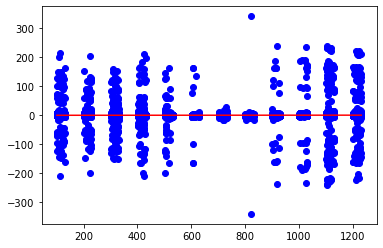

In [44]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

### BEGIN SOLUTION
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
### END SOLUTION